In [3]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
import pandas as pd
from scipy import stats
import numpy as np
#
from supports._setting import aiport_trips_dir
from supports.charts import histograms
from supports.charts import one_histogram
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
Y09 = pd.read_csv('%s/%s'%(aiport_trips_dir, 'Y09-airport-trip.csv'))
Y09 = Y09[(Y09['did'] != -1)]
Y10 = pd.read_csv('%s/%s'%(aiport_trips_dir, 'Y10-airport-trip.csv'))
Y10 = Y10[(Y10['did'] != -1)]

In [5]:
CENT = 100
Y09_mm_did_gb, Y10_mm_did_gb = Y09.groupby(['mm', 'did']), Y10.groupby(['mm', 'did'])
Y09_ap_fares = [ x / CENT for x in list(Y09_mm_did_gb.sum()['fare'])]
Y10_ap_fares = [ x / CENT for x in list(Y10_mm_did_gb.sum()['fare'])]

In [6]:
print 'T-test: t statistics %.3f, p-value %.3f' %(stats.ttest_ind(Y09_ap_fares, Y10_ap_fares, equal_var = False))

T-test: t statistics -15.280, p-value 0.000


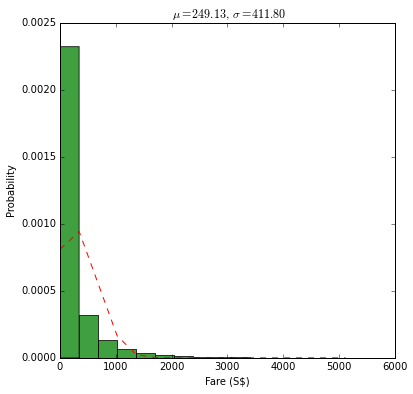

In [11]:
one_histogram('', 'Fare (S$)', 'Probability', 15, Y09_ap_fares, save_fn='Y2009_driver_monthly_fares_ap')

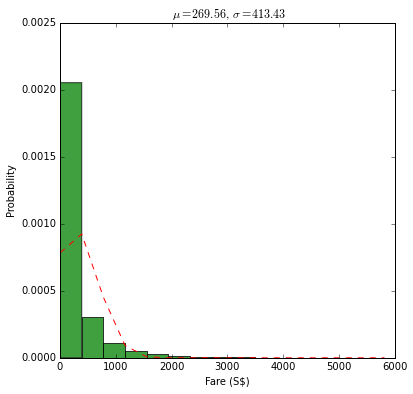

In [12]:
one_histogram('', 'Fare (S$)', 'Probability', 15, Y10_ap_fares, save_fn='Y2010_driver_monthly_fares_ap')

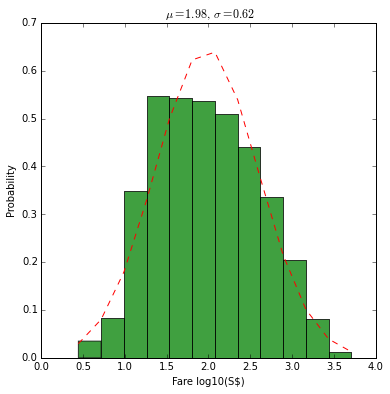

In [13]:
one_histogram('', 'Fare log10(S$)', 'Probability', 12, np.log10(Y09_ap_fares), save_fn='Y2009_driver_monthly_fares_ap_log')

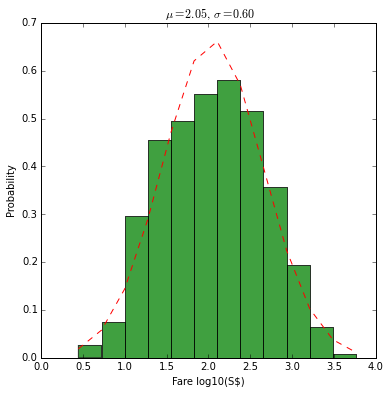

In [14]:
one_histogram('', 'Fare log10(S$)', 'Probability', 12, np.log10(Y10_ap_fares), save_fn='Y2010_driver_monthly_fares_ap_log')

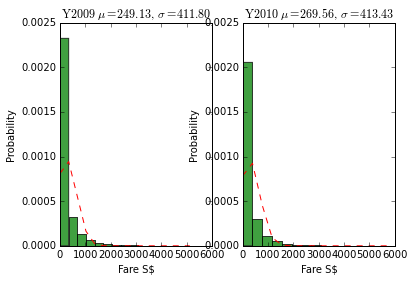

In [15]:
chart_info = [
    [('Y2009', 'Fare S$', 'Probability', 15, Y09_ap_fares), 
     ('Y2010', 'Fare S$', 'Probability', 15, Y10_ap_fares)]
    ]

histograms(chart_info)

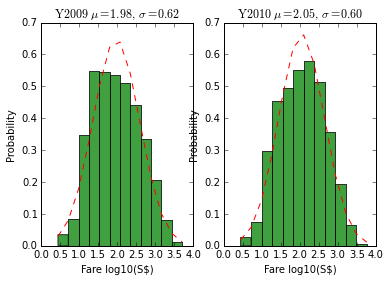

In [25]:
chart_info = [
    [('Y2009', 'Fare log10(S$)', 'Probability', 12, np.log10(Y09_ap_fares)), 
     ('Y2010', 'Fare log10(S$)', 'Probability', 12, np.log10(Y10_ap_fares))
    ]
]
histograms(chart_info)